In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np

In [2]:
def fff(x):
  with open(x) as file: 
    line = []
    for lines in file.readlines():
      line.append(lines)
    return line
line = fff('/content/drive/MyDrive/Colab_Notebooks/nlp_emotion/train.txt')

In [3]:
line[0:15]

['i didnt feel humiliated;sadness\n',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness\n',
 'im grabbing a minute to post i feel greedy wrong;anger\n',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love\n',
 'i am feeling grouchy;anger\n',
 'ive been feeling a little burdened lately wasnt sure why that was;sadness\n',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny;surprise\n',
 'i feel as confused about life as a teenager or as jaded as a year old man;fear\n',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit;joy\n',
 'i feel romantic too;love\n',
 'i feel like i have to make the suffering i m seeing mean something;sadness\n',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter;joy\n'

In [4]:
def csv(line):
  list1,list2 = [],[]
  for lines in line:
    x,y = lines.split(';')
    y = y.replace('\n','')
    list1.append(x)
    list2.append(y)
  df = pd.DataFrame(list(list1),columns=['sentence'])
  df['emotion'] = list2
  return df

In [5]:
df = csv(line)

In [6]:
df

,sentence,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [7]:
df.emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


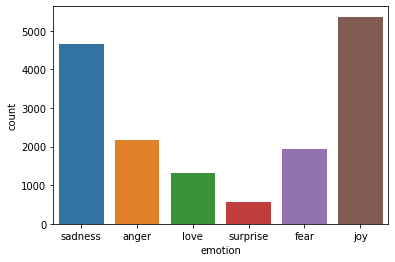

In [8]:
sns.countplot(df.emotion)

In [9]:
df.isnull().sum()

sentence    0
emotion     0
dtype: int64

##feature engineering

###feature creation

In [10]:
df['sen_len'] = df['sentence'].apply(lambda x: len(x))
df

,sentence,emotion,sen_len
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


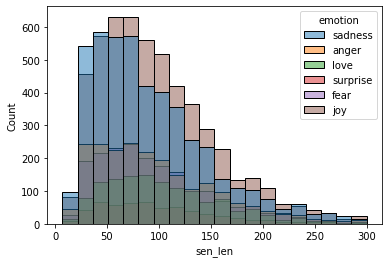

In [11]:
sns.histplot(df, x=df['sen_len'], hue=df['emotion'], bins=20)

we can clearly see there is no definite relation between emotion and sentence length. so, the feature is of no use

##text preprocessing
####stopwords
####lematization
####count vectorizer


In [12]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
wn = WordNetLemmatizer()

In [51]:
def lem(x):
  corpus = []
  for line in x:
    words = line.split()
    print(words)
    y = [wn.lemmatize(word.lower()) for word in words if not word in stopwords.words('english')]
    y = ' '.join(y)
    corpus.append(y)
  return corpus
x = lem(['you are making me cry'])

['you', 'are', 'making', 'me', 'cry']


In [52]:
print(x)

['making cry']


##handling test data

In [16]:
test_line = fff('/content/drive/MyDrive/Colab_Notebooks/nlp_emotion/test.txt') 
test_df = csv(test_line)
test_df[:5]
x_test = lem(test_df['sentence'])

In [17]:
#here I'm combinig both train and test data before vectorization so that both of them will have same vocabulary and size
all = x + x_test
len(all)

18000

In [18]:
cv = CountVectorizer()
all_ = cv.fit_transform(all)
all_ = all_.toarray()
all_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
x_train = all_[:16000]
x_test = all_[16000:]

labelling test and train data

In [20]:
y_train = df.iloc[:,1].values


In [21]:
y_test = test_df.iloc[:,1].values

###building and training the model

In [22]:
print(len(x_train),
len(x_test),
len(y_train),
len(y_test))

16000 2000 16000 2000


In [23]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8005


In [50]:
sen = ["you are making me cry"]
sen = lem(sen)
print(sen)
sen = cv.transform(sen).toarray()
model.predict(sen)[0]

['you', 'are', 'making', 'me', 'cry']
['making cry']


'sadness'

In [27]:
# import joblib
# with open('/content/drive/MyDrive/Colab_Notebooks/nlp_emotion/nlp_emotion.sav', 'wb') as file:
#    joblib.dump(model, file)

In [28]:
# with open('/content/drive/MyDrive/Colab_Notebooks/nlp_emotion/vecfile.sav', 'wb') as file:
#     joblib.dump(cv, file)